**해군사 AI 과정**

Day 3: 2021-06-02

User: 문영제

실습 #1: California Housing Price 집값 예측 회귀 모델 학습하기

## 실습 #1-1. Toy-Example을 사용한 선형회귀 기법 (Linear Regression)

In [5]:
# 선형 회귀 모델을 정규 방정식을 통해 도출하기
import numpy as np
X = np.array([[5.0, 3.4, 1.5, 0.2],
              [6.1, 2.8, 4.7, 1.2],
              [6.9, 3.1, 5.1, 2.3],
              [5.8, 2.7, 4.1, 1.0]])
y = np.array([[2],
              [1],
              [3],
              [1]])

# 정규 방정식: (X^T*X)^-1 * X^T * y
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),
                            np.transpose(X)),y)
print(theta)

# X는 정방행렬이므로 아래 함수로도 구할 수 있음
theta_simple = np.matmul(np.linalg.inv(X),y)
print(theta_simple)

# theta와 theta_simple 값을 비교해 보세요

[[ 0.04312268]
 [ 0.75390335]
 [-0.76728625]
 [ 1.86022305]]
[[ 0.04312268]
 [ 0.75390335]
 [-0.76728625]
 [ 1.86022305]]


In [6]:
# Scikit-learn 라이브러리를 활용한 회귀 모델 학습
# 위 행렬을 이용한 것과 같은 방식이에요.

from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([[5.0, 3.4, 1.5, 0.2],
              [6.1, 2.8, 4.7, 1.2],
              [6.9, 3.1, 5.1, 2.3],
              [5.8, 2.7, 4.1, 1.0]])
y = np.array([[2],
              [1],
              [3],
              [1]])

# 학습 데이터 X와 target인 y를 가지고 학습
lin_reg = LinearRegression(fit_intercept=False) # fit_intercept는 절편을 회귀에서
                              # 사용할 지에 대한 여부임. False이면, 사용안함!

lin_reg.fit(X, y)             # 학습은 fit()으로!

print(lin_reg.coef_)          # theta_1 ~ 4가 이 값에 해당하며, coefficient와 
                              # weight는 여기에서 같은 의미로 사용함.
                              # coef_를 weight라고 생각하면 됨!

print(lin_reg.intercept_)     # intercept는 선형대수학에서 bias (편향)을 뜻함
                              # 여기에서는 theta_0임

[[ 0.04312268  0.75390335 -0.76728625  1.86022305]]
0.0





복습 #1-2: California Housing Price Dataset 학습 데이터 처리하기

*이탤릭체 텍스트*# **실습 #1-2-0: California Housing Price Dataset을 다운로드 받아야합니다.**
- 먼저 Google에서 California Housing Price Dataset을 검색해주세요.
- "California Housing Prices | Kaggle"이라고 쓰여있는 글을 클릭해주세요.
- housing.csv 파일을 다운로드해주세요.

- 그 후 왼쪽 탭에서 Google Colab으로 다운로드 받은 housing.csv 파일을 업로드해줍니다.

# **실습 #1-2-1: 데이터 불러오기 그리고 살펴보기**

**pandas**는 학습 데이터를 관리하고 처리하기에 매우 효율적인 라이브러리입니다.

In [7]:
# 데이터를 불러오는 과정입니다. 
# Pandas는 데이터를 처리하기에 매우 효율적인 라이브러리로 생각하시면 됩니다.
import pandas as pd

housing = pd.read_csv('housing.csv')  # Pandas 라이브러리의 read_csv 함수를 통해, 
                                      # Colab 상에 업로드한 housing.csv 파일을 
                                      # 읽습니다.
housing.head(10)  # housing data에 처음 10개의 데이터를 출력해서 살펴봅니다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


특정 위치의 값들을 꺼내볼 수도 있습니다.

In [8]:
housing.iloc[50]

longitude              -122.27
latitude                 37.82
housing_median_age          21
total_rooms                896
total_bedrooms             453
population                 735
households                 438
median_income           0.9218
median_house_value      171900
ocean_proximity       NEAR BAY
Name: 50, dtype: object

In [9]:
housing.iloc[20]

longitude              -122.27
latitude                 37.85
housing_median_age          40
total_rooms                751
total_bedrooms             184
population                 409
households                 166
median_income           1.3578
median_house_value      147500
ocean_proximity       NEAR BAY
Name: 20, dtype: object

California Housing Price 데이터셋이 가지고 있는 데이터의 양은 얼마나 될까요?

In [10]:
housing.size

206400

In [11]:
housing.shape[0]  # 총 20640개의 부동산 정보를 포함하고 있습니다.

20640

In [12]:
housing.shape[1]  # 각 부동산마다 10개의 특징(feature)을 포함하고 있습니다.

10

housing 데이터셋의 information을 출력할 수 있습니다.

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# **실습 #1-2-2: 데이터를 표현하고 살펴봅시다.**

**matplotlib**는 데이터를 그림화하는데 매우 유용한 라이브러리입니다.

In [14]:
import matplotlib # 라이브러리 가져오기

In [15]:
import matplotlib.pyplot as plt  # matplotlib 라이브러리 내의 pyplot 함수를 
                                 # 가져오며, 이를 plt로 명칭

In [16]:
col_list = list(housing)
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


위의 코드를 보면, pandas의 read_csv()로 가져온 객체를 리스트로 변환시키면, 각 feature들 이름의 문자열 형태를 element로 가지게 됩니다.

In [17]:
col_list.remove('ocean_proximity')  # 리스트 내에 'ocean_proximity'를 제거 합니다.
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [18]:
col_list[0]     # col_list의 첫 번째 feature가 'longitude' 입니다.

'longitude'

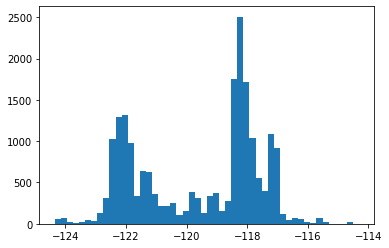

In [19]:
hist = plt.hist(housing['longitude'], bins=50)

- plt.hist()의 첫 번째 인자는 데이터들을 넣습니다. pandas로 가져온 객체에서 feature를 key로 하는 데이터를 지정하면 됩니다.
- bins는 x축의 간격 (x 데이터의 range) 입니다.

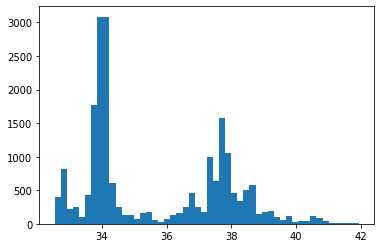

In [20]:
hist = plt.hist(housing['latitude'], bins=50)

이제 가장 중요한 median_house_value 값의 histogram을 출력해보세요

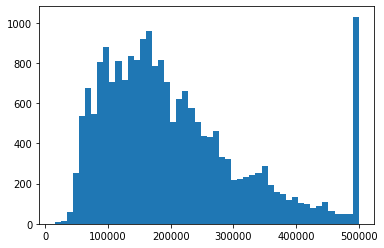

In [21]:
hist = plt.hist(housing['median_house_value'], bins=50)

median_income 값의 histogram 역시 출력해봅시다.

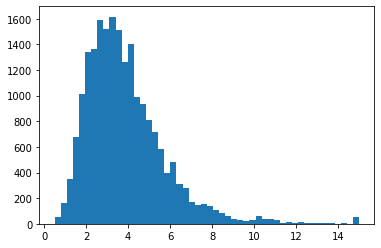

In [22]:
hist = plt.hist(housing['median_income'], bins=50)

# **Popup 실습: 각 데이터가 담은 모든 종류의 정보들에 대해서 히스토그램을 한번에 출력하는 code를 작성해보세요 (hint: 반복문(for)를 사용해보세요).**

col: longitude


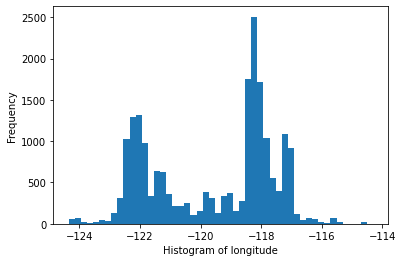

col: latitude


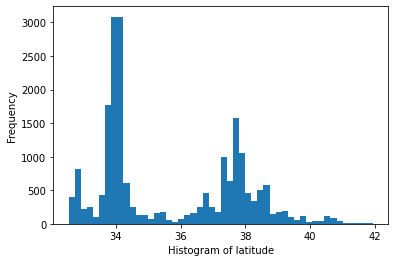

col: housing_median_age


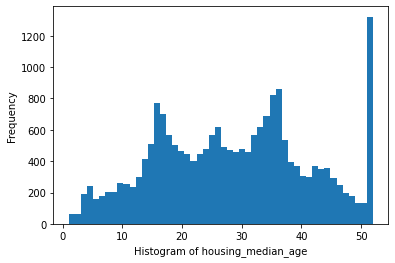

col: total_rooms


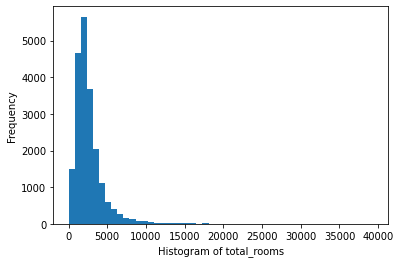

col: total_bedrooms


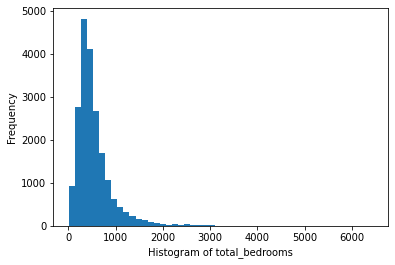

col: population


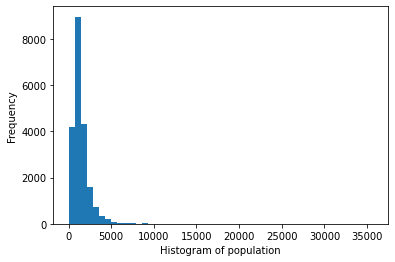

col: households


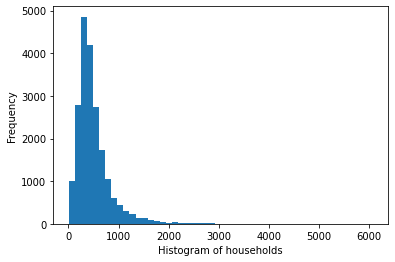

col: median_income


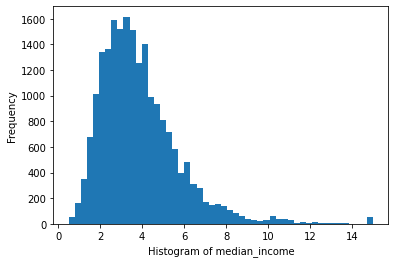

col: median_house_value


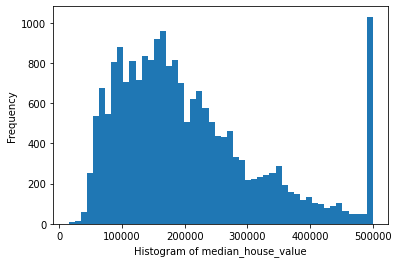

In [23]:
for col in col_list:
  print("col: " + col)
  hist = plt.hist(housing[col], bins=50)
  plt.xlabel("Histogram of " + col)
  plt.ylabel("Frequency")
  plt.show()

# **실습 #1-2-3: matplotlib을 활용한 복잡한 데이터 시각화를 따라해봅시다.**

pandas의 plot()
- kind: 그래프 종류
- x: x 데이터들의 모음
- y: y 데이터들의 모음 (결국 위 x와 y의 조합으로 (x, y)를 만듦)
- alpha: 투명도
- s: 원의 크기
- label: 데이터가 무엇을 나타내는지 라벨링
- figsize: 그래프 크기 (inch 단위 가로와 세로)
- c: 데이터 색 기준 (값 크기에 따라 변화)
- cmap: 색 테마
- colorbar: 옆에 colorbar 표시 유무

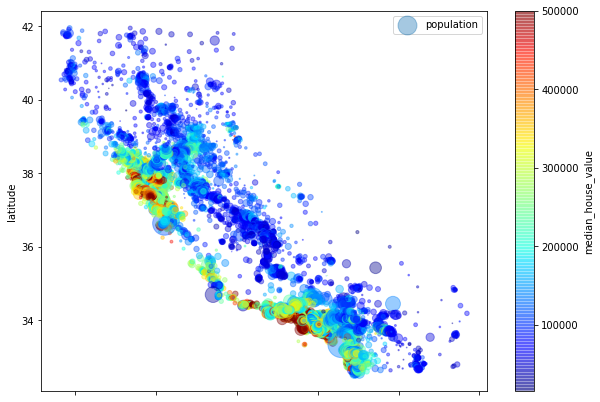

In [24]:
import matplotlib
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/50, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

---
- s를 "population"이 아닌 "total_rooms"로 변경. 값의 차이로 인해 나눠주는 값을 100으로 변경

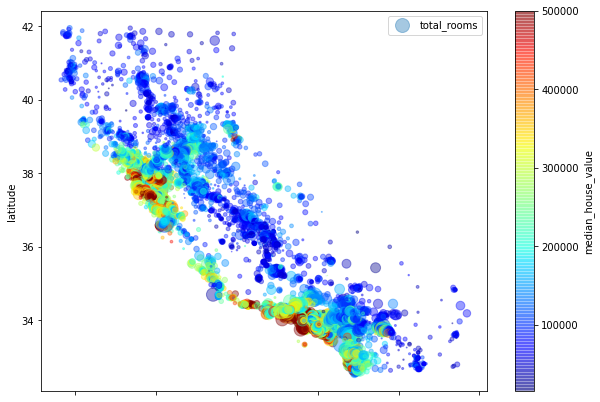

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["total_rooms"]/100, label="total_rooms", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

---
- c를 madian_income으로 변경 (좀 더 색 구분을 위해 100을 곱해줌)

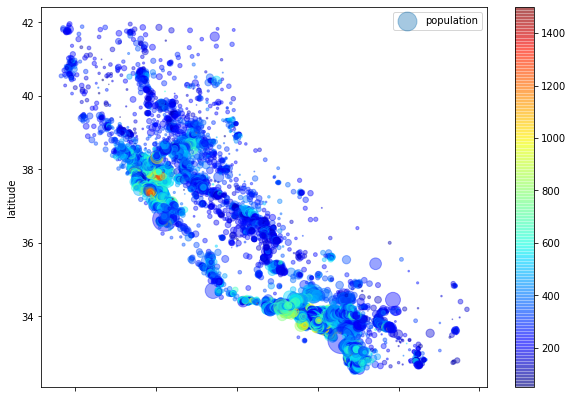

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/50, label="population", figsize=(10,7),
             c=housing["median_income"]*100, cmap=plt.get_cmap("jet"), 
             colorbar=True)

---
- 색 테마를 "jet"에서 "hot"으로 변경

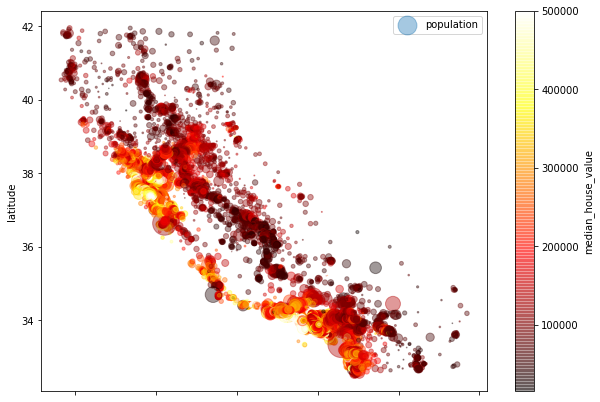

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("hot"), colorbar=True)

---
- 투명도 (alpha)를 1.0으로 변경 (더 선명하게, 하지만 원 간의 구분은 더 확실히 되어 좀 지저분해 보임)

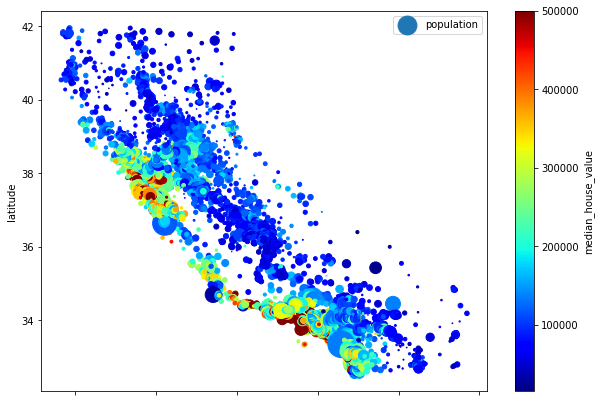

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1.0, 
             s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

---
- 그래프 크기를 변경함 (10,7) -> (15.10)

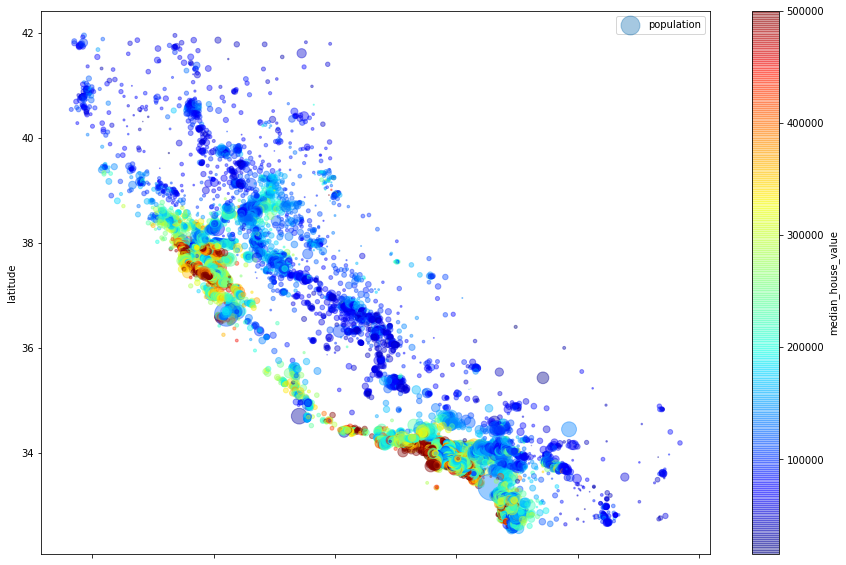

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/50, label="population", figsize=(15,10),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

# **실습 #1-2-4: 각 데이터가 가지고 있는 정보 사이의 관계를 살펴봅시다.**

x축을 median_income 그리고 y축을 median_house_value로 갖는 관계 그래프를 그려봅시다.

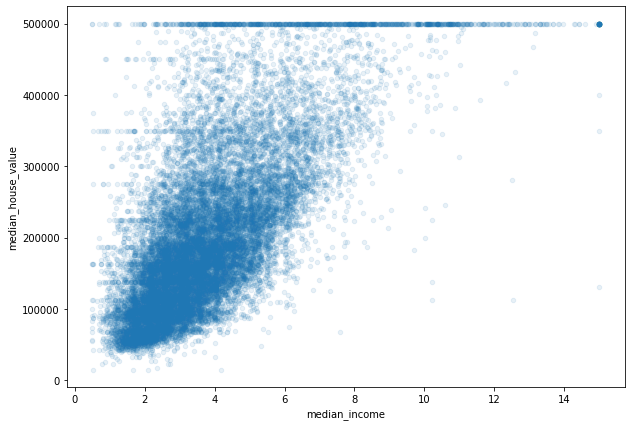

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1, figsize=(10,7))

# **Popup 실습: 강의자료에서 보여드렸던 다음 관계를 위에서처럼 그래프로 그려보세요.**
- total_rooms (x축), total_bedrooms (y축)
- housing_median_age (x축), median_house_value (y축)

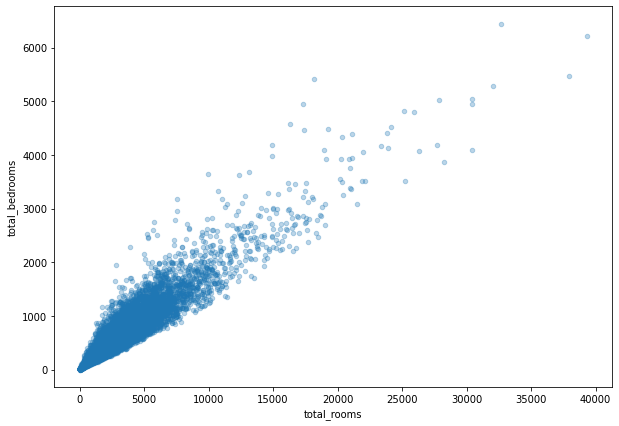

In [31]:
housing.plot(kind="scatter", x="total_rooms", y="total_bedrooms", 
             alpha=0.3, figsize=(10,7))

total_rooms와 total_bedrooms는 서로 높은 상관 관계를 가집니다.




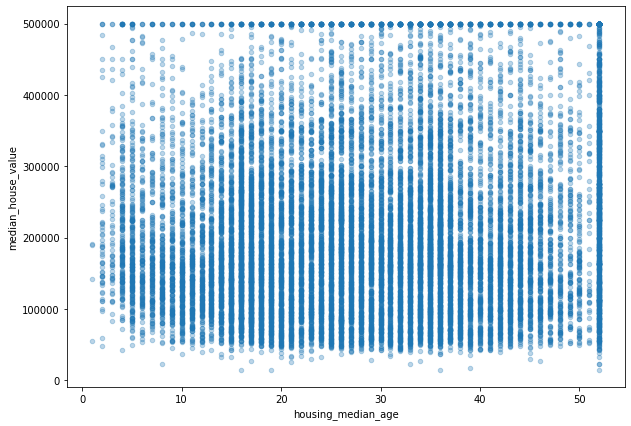

In [32]:
housing.plot(kind="scatter", x="housing_median_age", y="median_house_value", 
             alpha=0.3, figsize=(10,7))

housing_median_age와 median_house_value 는 상관 관계가 적습니다.

여러 피처(feature)들 사이의 관계를 한번에 그릴 수 있는 함수가 있습니다.
median_house_value, median_income, total_rooms, housing_median_age를 바탕으로 관계를 그려봅시다.

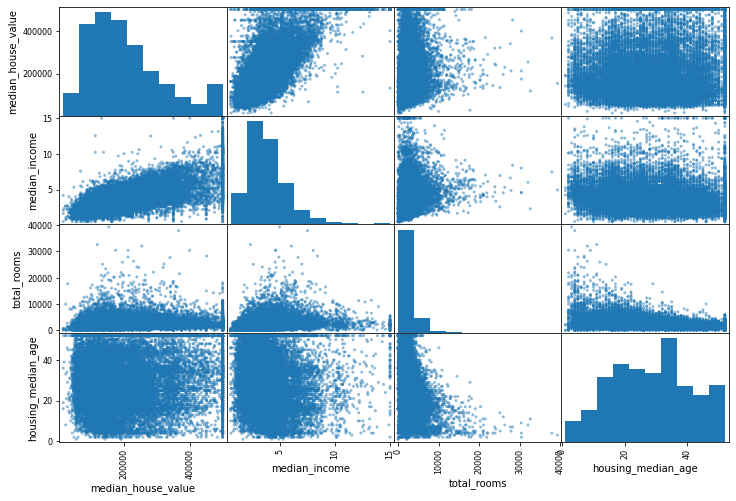

In [33]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", 
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8));

# **Popup 실습: 와 longitude (경도) 그리고 latitue (위도)정보를 추가로 고려하여 관계 그래프를 그려보세요!**

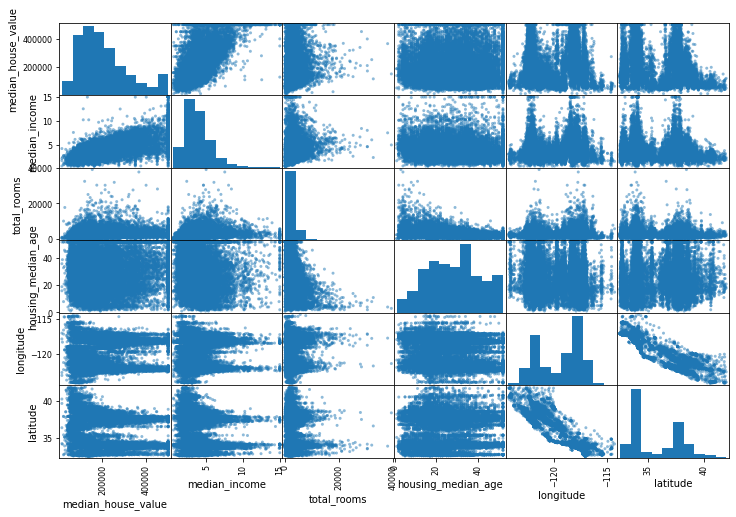

In [34]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age", "longitude", "latitude"]
scatter_matrix(housing[attributes], figsize=(12,8));

# **실습 #1-2-5: median_house_value 정보가 다른 정보와 얼마나 연관이 큰지 출력할 수 있습니다.**

In [35]:
corr_matrix = housing.corr()        # housing.corr()이 각 feature 간의 상관계수를
                                    # 구함
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [36]:
corr_matrix['median_house_value'].sort_values(ascending=False) # 내림차순 정렬

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# **Popup 실습: total_rooms 그리고 housing_median_age가 다른 정보들과 보이는 관계도를 출력해보세요.**

In [37]:
corr_matrix['total_rooms'].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.930380
households            0.918484
population            0.857126
median_income         0.198050
median_house_value    0.134153
longitude             0.044568
latitude             -0.036100
housing_median_age   -0.361262
Name: total_rooms, dtype: float64

In [38]:
corr_matrix['housing_median_age'].sort_values(ascending=False)

housing_median_age    1.000000
median_house_value    0.105623
latitude              0.011173
longitude            -0.108197
median_income        -0.119034
population           -0.296244
households           -0.302916
total_bedrooms       -0.320451
total_rooms          -0.361262
Name: housing_median_age, dtype: float64

# **실습 #1-2-6: 학습에 들어가기 전 학습 데이터 전처리 과정**

정보 중 total_bedrooms은 정보가 없는 데이터도 존재합니다. 따라서, total_bedrooms에 정보가 비어있는 데이터는 median 값으로 채우고자 합니다.

In [39]:
# 특정 feature에 중앙값 (median)을 구해주는 method
median = housing["total_bedrooms"].median()

# pandas의 fillna()로 나머지 부족한 값들을 채워줄 수 있음
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median) 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


앞에서 total_rooms와 total_bedrooms 그리고 household가 서로 간에 연관이 매우 큰 것을 확인하였습니다. 학습 위해서 더 의미있는 데이터로 가공할 필요가 있고,

- 이를 위해서 total_room는 "rooms_per_household"로 바꾸고
- total_bedrooms는 "bedrooms_per_household"로 바꿉시다.

In [40]:
 housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
 del housing["total_rooms"] # total_rooms feature 삭제
 housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_bedrooms       20640 non-null  float64
 4   population           20640 non-null  float64
 5   households           20640 non-null  float64
 6   median_income        20640 non-null  float64
 7   median_house_value   20640 non-null  float64
 8   ocean_proximity      20640 non-null  object 
 9   rooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# **Popup 실습: total_bedrooms 역시 "bedrooms_per_household"로 바꿔주세요.**

In [41]:
 a = housing["total_bedrooms"] / housing["households"] # 두 줄로 표현
 housing["bedrooms_per_household"] = a

 del housing["total_bedrooms"]
 
 housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               20640 non-null  float64
 1   latitude                20640 non-null  float64
 2   housing_median_age      20640 non-null  float64
 3   population              20640 non-null  float64
 4   households              20640 non-null  float64
 5   median_income           20640 non-null  float64
 6   median_house_value      20640 non-null  float64
 7   ocean_proximity         20640 non-null  object 
 8   rooms_per_household     20640 non-null  float64
 9   bedrooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


학습 데이터의 정보 값들을 적절한 크기의 값으로 정규화 해줘야합니다.

**sklearn**이라는 매우 유용한 학습 라이브러리를 활용합니다.

참조 [데이터 스케일링](https://homeproject.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-Data-Scaling)

데이터 스케일링은 데이터 전처리 과정 중 하나입니다. 데이터 스케일링을 해주는 이유는 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으로 수렴하거나 무한으로 발산해버릴 수 있기 때문입니다.

따라서, scaling은 데이터 전처리 과정에서 굉장히 중요한 과정입니다.

Scaler 종류:
- StandardScaler: 각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 같은 스케일을 갖게 됩니다.
- RobustScaler: 모든 특성들이 같은 크기를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 median과 quartile을 사용합니다. RobustScaler는 이상치에 영향을 받지 않습니다.
- MinMaxScaler: 모든 feature가 0과 1사이에 위치하게 만듭니다. 데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.
- (4) Normalizer: StandardScaler, RobustScaler, MinMaxScaler가 각 columns의 통계치를 이용한다면 Normalizer는 row마다 각각 정규화됩니다. Normalizer는 유클리드 거리가 1이 되도록 데이터를 조정합니다. (유클리드 거리는 두 점 사이의 거리를 계산할 때 쓰는 방법, L2 Distance)


In [42]:
# 우선 정규화하지 않은 feature들을 제거함
#   아래 코드 형식은 거의 패턴으로써 비슷하게 사용됩니다.
#   그대로 가져다 쓰시되 적절한 값들로 넣어주시면 됩니다.
#   강의 교수님들도 이 패턴을 외워서 (가져다) 쓰라고 추천.
col_list = list(housing) 
col_list.remove("ocean_proximity") # 문자열이니까 정규화 불필요
col_list.remove("median_house_value") # target 값은 정규화하지 않음

# 정규화를 위해 우리는 sklearn.preprocessing의 StandardScaler를 사용!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 지금 hosing에는 문자열 데이터 feature와 target이 포함되어 있음
# "ocean_proximity"와 "median_house_value"가 빠진 데이터들만 구성된 새로운
# pandas의 DataFrame 객체를 정의! (housing_numeric)
housing_numeric = housing[col_list]
print(housing_numeric)

# 실제 정규화를 해주는 main 작업
# 아래 작업 내용을 정리하면,
# step1: DataFrame 타입의 데이터를 정규화 (Series 타입의 데이터로 변경됨)
housing_scaled = scaler.fit_transform(housing_numeric)
print(housing_scaled)

# step2: 'Series'타입의 데이터를 to 'DataFrame' 타입으로 변경 pd화!
# (fit_transform으로 series화 됨)
# 아래 코드 의미:
#   - housing_scaled를 기반으로, index는 housing_numeric.index를
#   - columns 파트는 housing_numeric.columns에 것으로 구성
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, 
                                 columns=housing_numeric.columns)

# step3: 제거했던 feature 두 가지 (ocean_proximity와 median_house_value) 추가
# 위에 만든 DataFrame인 housing_scaled_df에 열 방식으로 "median_house_value" 와
# "ocean_proximity" 를 붙임 (완벽한 데이터 모양)
housing = pd.concat([housing_scaled_df, housing["median_house_value"], 
                     housing["ocean_proximity"]], axis=1)
housing.head()

# 왜 이렇게 복잡하게 구현이 되었을까요?
# 실제로는 scaler.fit_transform()만 사용하여, 바로 학습하면 되었지만, 우리는 하나
# 처리하지 않은 것이 있어요. 바로 ocean_proximity 입니다.
# one-hot encoding을 쉽게 하기 위해 전체 데이터가 행렬 형태의 학습 가능 데이터가
# 아니라 pandas 객체로 되어 있어야 해요 (pd.DataFrame())
# 그래서 우리는 데이터 정규화를 한 후에 다시 그 데이터를 pandas 객체로 만들어주고, 
# ocean_proximity를 다시 붙여주는 (부동산 가격도) 작업을 추가로 한 것이랍니다.

       longitude  latitude  ...  rooms_per_household  bedrooms_per_household
0        -122.23     37.88  ...             6.984127                1.023810
1        -122.22     37.86  ...             6.238137                0.971880
2        -122.24     37.85  ...             8.288136                1.073446
3        -122.25     37.85  ...             5.817352                1.073059
4        -122.25     37.85  ...             6.281853                1.081081
...          ...       ...  ...                  ...                     ...
20635    -121.09     39.48  ...             5.045455                1.133333
20636    -121.21     39.49  ...             6.114035                1.315789
20637    -121.22     39.43  ...             5.205543                1.120092
20638    -121.32     39.43  ...             5.329513                1.171920
20639    -121.24     39.37  ...             5.254717                1.162264

[20640 rows x 8 columns]
[[-1.32783522  1.05254828  0.98214266 ...  2.34476

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_household,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-0.148514,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.248542,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-0.052902,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.053647,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.038196,342200.0,NEAR BAY


텍스트로 이루어진 "ocean_proximity" 값 또한 숫자로 변형해줍니다.
pd.get_dummies()를 사용하면, feature들 중 분류 데이터로 된경우에 그들을 one-hot encoding 형태로 변경해 줌

In [43]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_household,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-0.148514,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.248542,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-0.052902,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.053647,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.038196,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.005233,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.288066,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,-0.075290,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.032239,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.213262,261100.0,0,0,0,1,0


# **실습 #1-2-7: 전체 데이터를 학습/테스트 데이터로 나누고, feature 그리고 target 정보로 나눠야 합니다.**

**sklearn** 학습 라이브러리 안의 함수를 활용하여 데이터를 학습/테스트로 나눕니다.

In [44]:
# training - test seperation
from sklearn.model_selection import train_test_split

# random_state는 일종의 random seed
# 80%:20% set을 무작위로 섞어서 만듦 
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print('# of train_set : %.0f, # of test_set : %.0f' % 
      (train_set.shape[0], test_set.shape[0]))

# of train_set : 16512, # of test_set : 4128


간단한 drop 함수 그리고 copy 함수를 사용하여 feature (학습에 사용되는 정보) 그리고 target (학습해서 맞춰야하는 정보)로 나눕니다.

In [45]:
# feature and label seperation of training set
train_set_features = train_set.drop('median_house_value',axis=1)
train_set_target = train_set["median_house_value"].copy()

# **실습 #1-3: 전처리가 끝난 학습 데이터를 바탕으로 scikit-learn 라이브러리를 통해 집값 예측 선형 회귀 모델을 학습해봅시다.**

In [46]:
# 이것도 마찬가지입니다.
# 선형 회귀의 기본적 코드 모델이며, 실제 train과 test만 다른 것으로 바꾸어서
# 선형 회귀의 경우에 사용하세요.
from sklearn.linear_model import LinearRegression   # 선형회귀
from sklearn.metrics import mean_squared_error      # 평균제곱에러 (MSE)

# 선형 회귀 (LinearRegression)을 사용하여, 학습
lin_reg = LinearRegression()
lin_reg.fit(train_set_features, train_set_target)   # feature set과 target set
print("Learned Parameters : ")
print(lin_reg.coef_)                                # 가중치 출력
print(lin_reg.intercept_)                           # 편향 출력
print()

# test set 또한 위에서 했던 방식으로 feature와 target을 구분!
test_set_features = test_set.drop('median_house_value',axis=1)
test_set_target = test_set["median_house_value"].copy()

# 예측 (추론)은 아래와 같은 방법으로
final_model = lin_reg
final_predictions = final_model.predict(test_set_features)

# 성능 측정
accuracy = lin_reg.score(test_set_features, test_set_target)
print("Accuracy: ", accuracy)

# MSE
final_mse = mean_squared_error(test_set_target, final_predictions)

print('final_linear_MSE : %.2f' % final_mse)

Learned Parameters : 
[-55492.054378   -56494.62911219  13826.45404021 -45409.43273728
  50658.0358886   78045.15239785 -15026.80798829  24247.66346749
 -18695.71364517 -55643.362724   113587.05147586 -23694.92293851
 -15553.05216819]
237503.84312194955

Accuracy:  0.5764999533169752
final_linear_MSE : 5549582634.59


> # The meaning of the "Train, Test, and Errors printing":
- train score가 100점 만점에 65점
- test score는 100점 만점에 57점
- 오차는 29% 정도



# **실습 #1-4: 같은 데이터들을 갖고 정규화 Ridge 회귀 모델을 학습해봅시다.**

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# ridge regression
model_ridge = Ridge(alpha = 100) # alpha 정규화에 사용하는 상수값         
model_ridge.fit(train_set_features, train_set_target) # train ridge regression

ridge_predicted = model_ridge.predict(test_set_features)

# 성능 평가
accuracy = model_ridge.score(test_set_features, test_set_target)
print("Accuracy: ", accuracy)

final_ridge_mse = mean_squared_error(test_set_target, ridge_predicted)
print("final_ridge_MSE : ", final_ridge_mse)

Accuracy:  0.5858811060516307
final_ridge_MSE :  5426651166.891342


Ridge 회귀의 코드 형태는 LinearRegression과 같아요!
단순히 회귀를 하는 함수가 LinearRegression()에서 Ridge로 변경되었고, Ridge()에서 정규화에 필요한 alpha에 대한 초모수 값을 지정한 것 밖에 다를 게 없어요

# **실습 #1-5: 같은 데이터들을 갖고 정규화 Lasso 회귀 모델을 학습해봅시다.**

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# lasso regression
model_lasso = Lasso(alpha = 1000)
model_lasso.fit(train_set_features,train_set_target)

lasso_predicted = model_lasso.predict(test_set_features)

# 성능 평가
accuracy = model_ridge.score(test_set_features, test_set_target)
print("Accuracy: ", accuracy)

final_lasso_mse = mean_squared_error(test_set_target, lasso_predicted)
print("MSE is : ", final_lasso_mse)

Accuracy:  0.5858811060516307
MSE is :  4982152967.148728


# MLP와 비교!! 만약 같은 데이터를 MLP를 사용하면 어떨까요? - 나중에 배웁니다. 결과만 확인하세요![링크 텍스트](https://)

In [52]:
from sklearn.neural_network import MLPRegressor

# MLP regressor
model_MLP = MLPRegressor(activation = 'relu', 
                         hidden_layer_sizes = (32, 64, 32), 
                         max_iter= 1000, solver= 'lbfgs')
model_MLP.fit(train_set_features, train_set_target)

MLP_predicted = model_MLP.predict(test_set_features)

# 성능 평가
accuracy = model_MLP.score(test_set_features, test_set_target)
print("Accuracy: ", accuracy)

final_MLP_mse = mean_squared_error(test_set_target, MLP_predicted)
print("MSE is : ", final_MLP_mse)

Accuracy:  0.6913507154363046
MSE is :  4044567936.198968


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
